In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split , cross_val_score

from sklearn.tree import DecisionTreeClassifier

import pydotplus #=> تبدیل نمودار به عکس
from sklearn.tree import export_graphviz  #=> مدل درخت رو میگیره و به فرمت برنامه گراف ویز در میاره
from IPython.display import Image
from io import BytesIO,StringIO  # فایلی داخل رم ذخیره میشه

In [2]:
x,y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test =train_test_split(x,y,test_size=0.1)
X_train.shape

(1617, 64)

In [74]:
model = DecisionTreeClassifier(max_depth=20,max_features=None)

sc = cross_val_score(model,X_train,y_train,cv=10)
sc.mean()

np.float64(0.8577793114024999)

In [75]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=20)

In [76]:
model.score(x,y)

0.9838619922092376

In [65]:
t = 5
print(model.predict(X_test[t].reshape(1,-1)))
y_test[t]

[7]


np.int64(7)

In [66]:
p = model.predict(x)

In [67]:
data = StringIO()
export_graphviz(model , out_file=data,filled=True,rounded=True,special_characters=True)

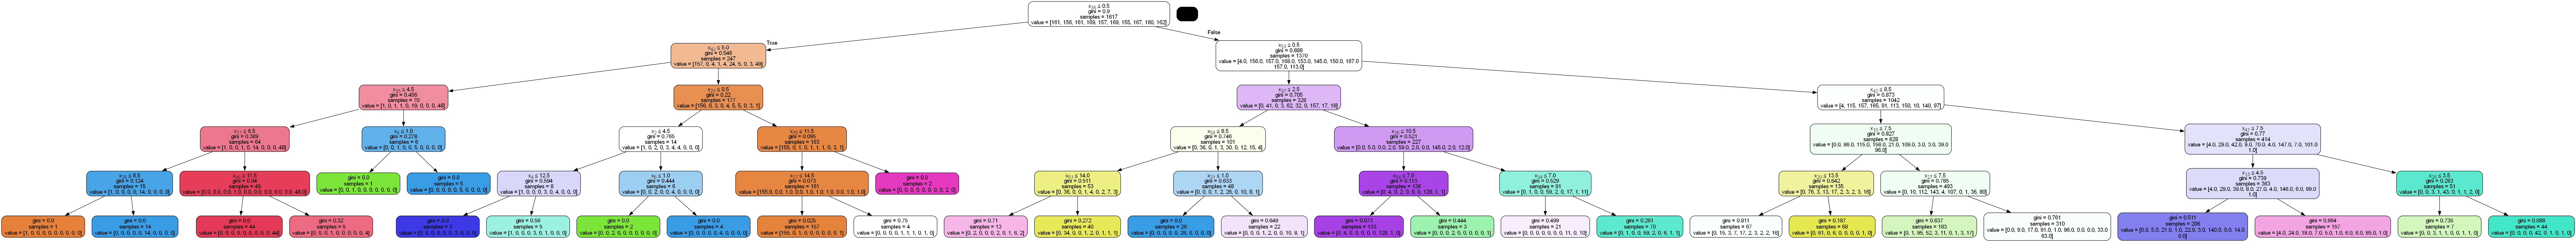

In [68]:
G = pydotplus.graph_from_dot_data(data=data.getvalue())
img = G.create_png()
Image(img)